In [9]:
#import the packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
from skimage.color import rgb2gray

In [10]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

# trainX = trainX.reshape((trainX.shape[0], 3072))
# testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [11]:
trainX_gray = rgb2gray(trainX)
testX_gray = rgb2gray(testX)
valX_gray = rgb2gray(valX)


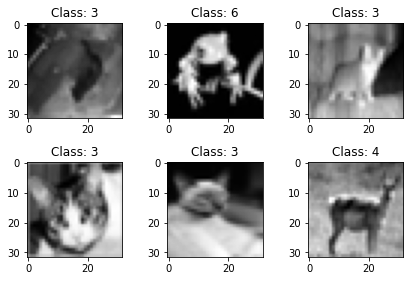

In [12]:
# Visualizing images from dataset
num_samples = 6
random_indices = np.random.choice(len(trainX), num_samples, replace=False)

for i, index in enumerate(random_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(trainX_gray[index], cmap='gray')
    plt.title(f"Class: {trainY[index][0]}")

plt.tight_layout()
plt.show()

In [13]:
print(trainX.shape)
print(testX.shape)
print(valX.shape)

# Convert trainX to grayscale

trainX = trainX_gray.reshape((trainX_gray.shape[0], -1))

# Convert testX to grayscale
testX = testX_gray.reshape((testX_gray.shape[0], -1))

valX = valX_gray.reshape((valX_gray.shape[0],-1))

print(trainX.shape)
print(testX.shape)
print(valX.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1024)
(10000, 1024)
(10000, 1024)


In [14]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
valY = lb.transform(valY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [15]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(1024,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [16]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(valX, valY),
	epochs=30, batch_size=32)

[INFO] training network...
Epoch 1/30
1250/1250 [==============================] - 7s 5ms/step - loss: 2.1417 - accuracy: 0.2087 - val_loss: 2.0082 - val_accuracy: 0.2827
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9993 - accuracy: 0.2783 - val_loss: 1.9209 - val_accuracy: 0.3218
Epoch 3/30
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9344 - accuracy: 0.3051 - val_loss: 1.8913 - val_accuracy: 0.3207
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8861 - accuracy: 0.3241 - val_loss: 1.8516 - val_accuracy: 0.3413
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8462 - accuracy: 0.3413 - val_loss: 1.8132 - val_accuracy: 0.3621
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8155 - accuracy: 0.3521 - val_loss: 1.8092 - val_accuracy: 0.3606
Epoch 7/30
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7903 - accuracy: 0.3642 - val_l

In [17]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

model.summary()

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.44      0.38      0.41      1000
  automobile       0.60      0.44      0.51      1000
        bird       0.35      0.42      0.38      1000
         cat       0.37      0.24      0.29      1000
        deer       0.31      0.42      0.36      1000
         dog       0.48      0.31      0.38      1000
        frog       0.43      0.53      0.48      1000
       horse       0.61      0.44      0.51      1000
        ship       0.41      0.68      0.51      1000
       truck       0.52      0.52      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 de

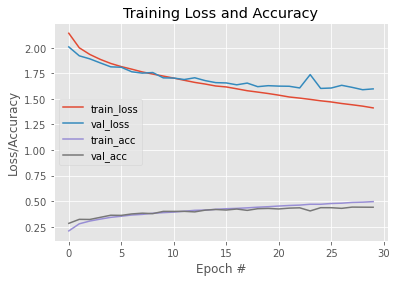

In [19]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

    airplane       0.44      0.38      0.41      1000
  automobile       0.60      0.44      0.51      1000
        bird       0.35      0.42      0.38      1000
         cat       0.37      0.24      0.29      1000
        deer       0.31      0.42      0.36      1000
         dog       0.48      0.31      0.38      1000
        frog       0.43      0.53      0.48      1000
       horse       0.61      0.44      0.51      1000
        ship       0.41      0.68      0.51      1000
       truck       0.52      0.52      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000

(10000,)
(10000,)


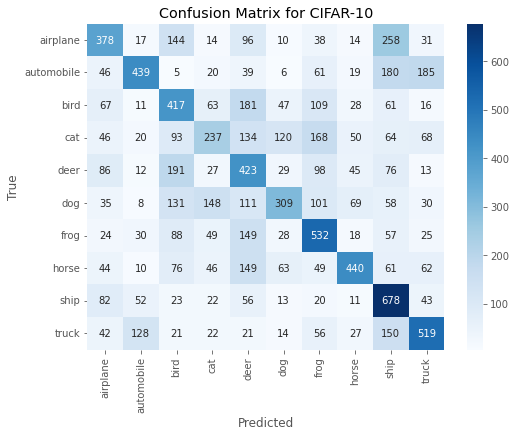

: 

In [21]:
# Make predictions on the test set
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testY, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=labelNames))


print(y_pred_classes.shape)
print(y_true.shape)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred_classes)

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()